In [1]:
import tensorflow as tf
print(tf.__version__) 


2.7.0


In [2]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd 

In [4]:
pwd

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd drive/MyDrive/Colab\ Notebooks/ 

/content/drive/MyDrive/Colab Notebooks


In [7]:
cd tamrin3(nn)

/content/drive/MyDrive/Colab Notebooks/tamrin3(nn)


In [8]:
cd lstm

/content/drive/MyDrive/Colab Notebooks/tamrin3(nn)/lstm


In [9]:
df = pd.read_csv("google.csv")

In [10]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume
0,0,2013-02-08,27.920,28.325,27.920,28.185,7146296
1,1,2013-02-11,28.260,28.260,27.930,28.070,5457354
2,2,2013-02-12,28.000,28.275,27.975,28.130,8665592
3,3,2013-02-13,28.230,28.230,27.750,27.915,7022056
4,4,2013-02-14,27.765,27.905,27.675,27.775,8899188


In [11]:
df.tail()

,Unnamed: 0,date,open,high,low,close,volume
1254,1254,2018-02-01,56.280,56.42,55.89,56.00,14690146
1255,1255,2018-02-02,55.900,56.32,55.70,55.77,15358909
1256,1256,2018-02-05,55.530,56.26,54.57,54.69,16059955
1257,1257,2018-02-06,53.685,56.06,53.56,55.61,17415065
1258,1258,2018-02-07,55.080,55.43,54.44,54.46,13927022


In [12]:
df.shape

(1259, 7)

In [13]:
len(df)

1259

In [14]:
series = df['close'].values.reshape(-1, 1)
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [15]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

### **Approach 1 --> Predict Stock Prices**


In [17]:
# Windows of length 10, next value being the target
T = 30 
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1229, 30, 1) Y.shape (1229,)


**Training an LSTM model**

In [36]:
%%time 
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)
#  beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0
# 


# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
20/20 [==============================] - 3s 39ms/step - loss: 0.1087 - val_loss: 0.0911
Epoch 2/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0107 - val_loss: 0.0232
Epoch 3/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0098 - val_loss: 0.0928
Epoch 4/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0080 - val_loss: 0.0259
Epoch 5/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.0201
Epoch 6/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0074 - val_loss: 0.0161
Epoch 7/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0065 - val_loss: 0.0167
Epoch 8/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0081 - val_loss: 0.0226
Epoch 9/80
20/20 [==============================] - 0s 13ms/step - loss: 0.0102 - val_loss: 0.0168
Epoch 10/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0081 - val_loss: 0.0177
Epoch 11/

**Plotting Loss Per Iteration**

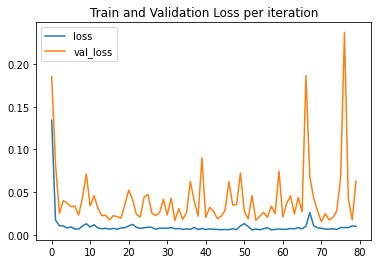

In [19]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss per iteration")
plt.legend()
plt.show()

**One-Step Forecast**

(1229, 1)


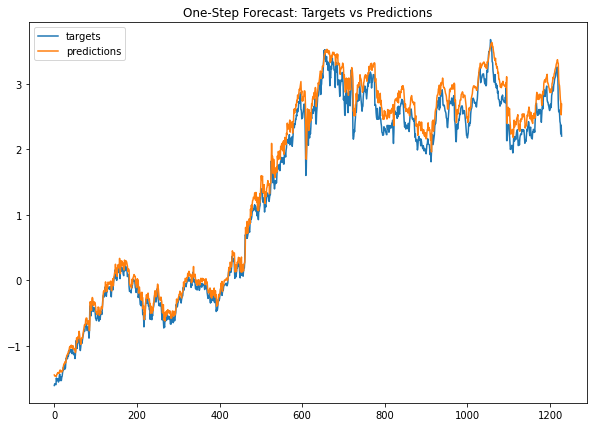

In [20]:

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-Step Forecast: Targets vs Predictions")
plt.legend()
plt.show()

## with sgd 

In [21]:

### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=SGD(learning_rate=0.1, momentum=0.9)
   #  learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
20/20 [==============================] - 6s 91ms/step - loss: 0.1322 - val_loss: 0.1146
Epoch 2/80
20/20 [==============================] - 0s 17ms/step - loss: 0.0212 - val_loss: 0.0660
Epoch 3/80
20/20 [==============================] - 0s 18ms/step - loss: 0.0125 - val_loss: 0.0513
Epoch 4/80
20/20 [==============================] - 0s 18ms/step - loss: 0.0118 - val_loss: 0.0306
Epoch 5/80
20/20 [==============================] - 0s 18ms/step - loss: 0.0097 - val_loss: 0.0374
Epoch 6/80
20/20 [==============================] - 0s 25ms/step - loss: 0.0086 - val_loss: 0.0370
Epoch 7/80
20/20 [==============================] - 0s 22ms/step - loss: 0.0091 - val_loss: 0.0290
Epoch 8/80
20/20 [==============================] - 0s 20ms/step - loss: 0.0082 - val_loss: 0.0443
Epoch 9/80
20/20 [==============================] - 0s 15ms/step - loss: 0.0081 - val_loss: 0.0236
Epoch 10/80
20/20 [==============================] - 0s 22ms/step - loss: 0.0089 - val_loss: 0.0392
Epoch 11/

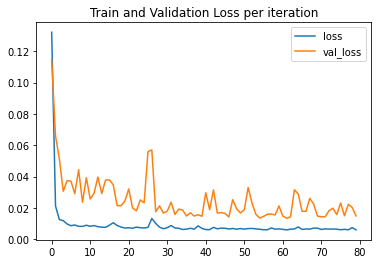

In [22]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss per iteration")
plt.legend()
plt.show()

(1229, 1)


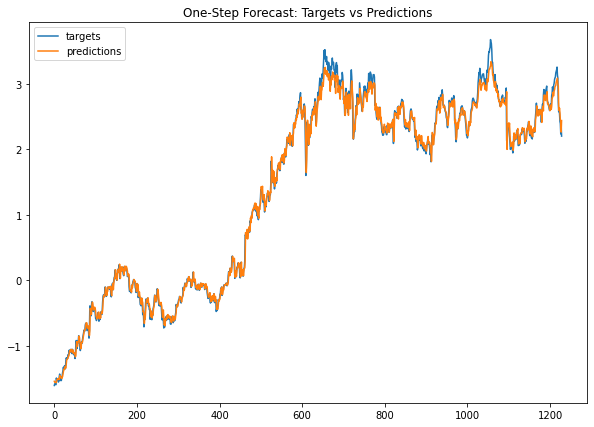

In [23]:
# با ران قبلیم که هفته پیش بود فرق داره؟
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-Step Forecast: Targets vs Predictions")
plt.legend()
plt.show()


# different neuron 

In [27]:

### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
x = Dense(1, activation='relu')(x)

model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
   #  learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
20/20 [==============================] - 3s 41ms/step - loss: 1.0344 - val_loss: 7.0447
Epoch 2/80
20/20 [==============================] - 0s 13ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 3/80
20/20 [==============================] - 0s 17ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 4/80
20/20 [==============================] - 0s 13ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 5/80
20/20 [==============================] - 0s 12ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 6/80
20/20 [==============================] - 0s 16ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 7/80
20/20 [==============================] - 0s 17ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 8/80
20/20 [==============================] - 0s 16ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 9/80
20/20 [==============================] - 0s 13ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 10/80
20/20 [==============================] - 0s 13ms/step - loss: 1.0286 - val_loss: 7.0447
Epoch 11/

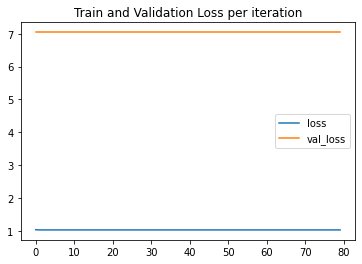

In [28]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss per iteration")
plt.legend()
plt.show()

(1229, 1)


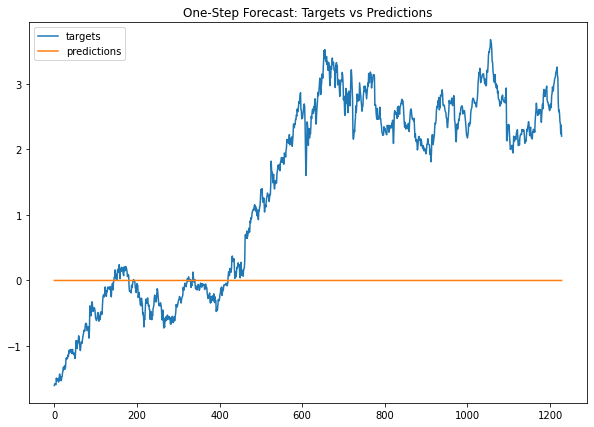

In [29]:

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-Step Forecast: Targets vs Predictions")
plt.legend()
plt.show()

In [58]:

### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.1),
   #  learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
20/20 [==============================] - 5s 71ms/step - loss: 0.1172 - val_loss: -0.4781
Epoch 2/80
20/20 [==============================] - 0s 23ms/step - loss: 0.1669 - val_loss: -0.7065
Epoch 3/80
20/20 [==============================] - 0s 24ms/step - loss: 0.1038 - val_loss: -0.5363
Epoch 4/80
20/20 [==============================] - 0s 24ms/step - loss: 0.0634 - val_loss: -0.4313
Epoch 5/80
20/20 [==============================] - 0s 21ms/step - loss: -0.0134 - val_loss: -0.6860
Epoch 6/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: -0.3759
Epoch 7/80
20/20 [==============================] - 0s 11ms/step - loss: -0.0705 - val_loss: -0.5055
Epoch 8/80
20/20 [==============================] - 0s 11ms/step - loss: -0.2429 - val_loss: -0.6171
Epoch 9/80
20/20 [==============================] - 0s 11ms/step - loss: -0.6832 - val_loss: -1.5417
Epoch 10/80
20/20 [==============================] - 0s 11ms/step - loss: -1.7824 - val_loss: -1

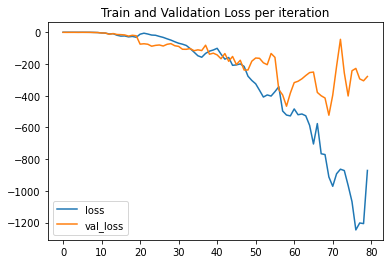

In [59]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss per iteration")
plt.legend()
plt.show()

(1248, 1)


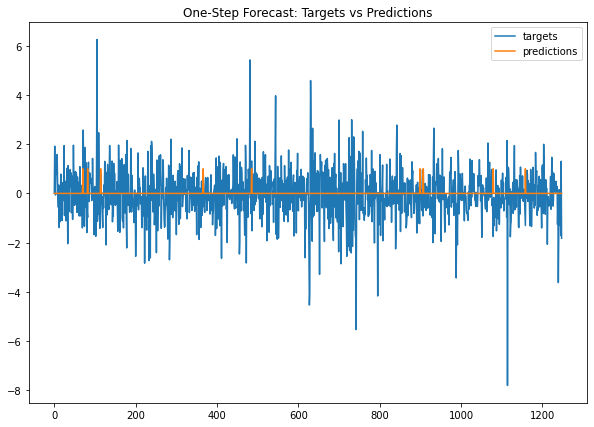

In [60]:

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-Step Forecast: Targets vs Predictions")
plt.legend()
plt.show()

**For one step forecast, adam with linear activation function is preforming really well. Now we'll try multi-step forecast with my best model :)**




**Multi-step forecast**

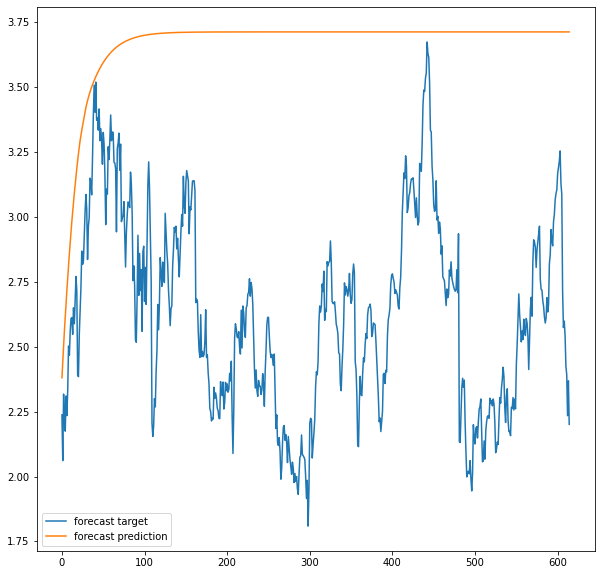

In [38]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.figure(figsize = (10,10))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

**For a multi-step forecast, the forecast is a straight line. The model is not predicting the next value, it's just copying the previous value that was its own output.**

### **Second Approach --> Predict Stock Returns**

**Stock Return is calculated as follows:**

(final price - initial price)/(initial price)

In [39]:
df['PrevClose'] = df['close'].shift(1) # move everything up 1
df.head()

,Unnamed: 0,date,open,high,low,close,volume,PrevClose
0,0,2013-02-08,27.920,28.325,27.920,28.185,7146296,NaN
1,1,2013-02-11,28.260,28.260,27.930,28.070,5457354,28.185
2,2,2013-02-12,28.000,28.275,27.975,28.130,8665592,28.070
3,3,2013-02-13,28.230,28.230,27.750,27.915,7022056,28.130
4,4,2013-02-14,27.765,27.905,27.675,27.775,8899188,27.915


In [40]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df.head()

,Unnamed: 0,date,open,high,low,close,volume,PrevClose,Return
0,0,2013-02-08,27.920,28.325,27.920,28.185,7146296,NaN,NaN
1,1,2013-02-11,28.260,28.260,27.930,28.070,5457354,28.185,-0.004080
2,2,2013-02-12,28.000,28.275,27.975,28.130,8665592,28.070,0.002138
3,3,2013-02-13,28.230,28.230,27.750,27.915,7022056,28.130,-0.007643
4,4,2013-02-14,27.765,27.905,27.675,27.775,8899188,27.915,-0.005015


**Plot the Stock Returns Histogram**

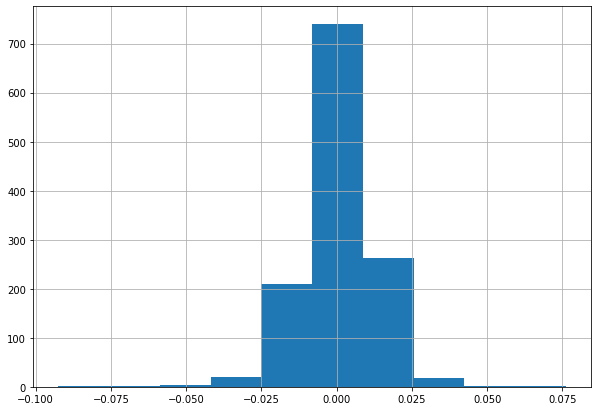

In [41]:
plt.figure(figsize = (10,7))
df['Return'].hist()
plt.show()

In [42]:
series = df['Return'].values[1:].reshape(-1, 1)

**Scale the Data**

In [43]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

**Training the LSTM model**

In [44]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) 
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [45]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
20/20 [==============================] - 3s 53ms/step - loss: 0.9925 - val_loss: 1.1410
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9913 - val_loss: 1.1615
Epoch 3/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9847 - val_loss: 1.1391
Epoch 4/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9854 - val_loss: 1.1460
Epoch 5/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9855 - val_loss: 1.1462
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9842 - val_loss: 1.1494
Epoch 7/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9861 - val_loss: 1.1518
Epoch 8/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9848 - val_loss: 1.1415
Epoch 9/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9835 - val_loss: 1.1543
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9810 - val_loss: 1.1504
Epoch 11/80

**Plotting Loss Per Iteration**

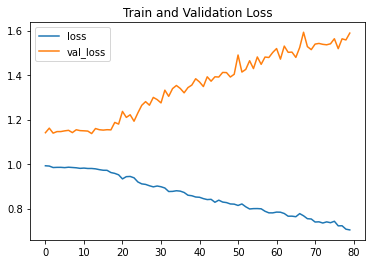

In [46]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

**One-Step Forecast of Stock Returns**

(1248, 1)


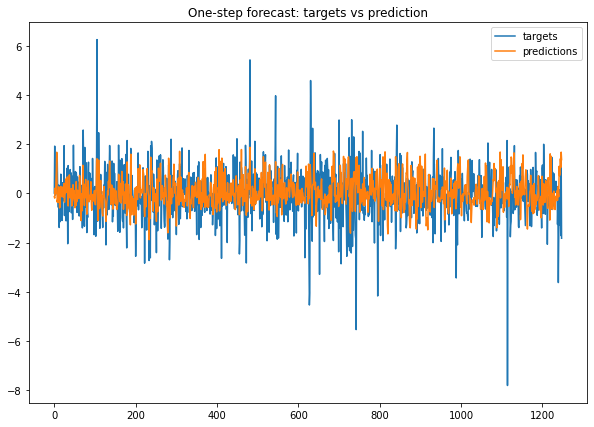

In [47]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]


plt.figure(figsize=(10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-step forecast: targets vs prediction")
plt.legend()
plt.show()

**Multi-step Forecast**

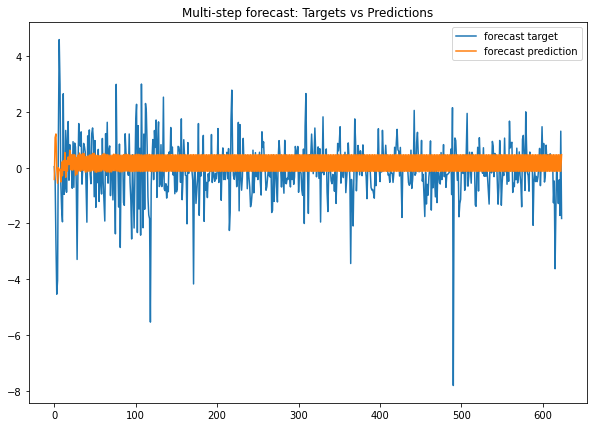

In [48]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.figure(figsize = (10, 7))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.title("Multi-step forecast: Targets vs Predictions")
plt.legend()
plt.show()

### **Third Approach**

1.   Predict whether the price will go up or down
2.   Predict whether the return will be positive or negative






In [49]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [50]:
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g. if T=10 and you have 11 data points then you'd only have 1 sample)

In [51]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [52]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [53]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [54]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 3s 32ms/step - loss: 0.6955 - accuracy: 0.5125 - val_loss: 0.6915 - val_accuracy: 0.5098
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6952 - accuracy: 0.5089 - val_loss: 0.6985 - val_accuracy: 0.4854
Epoch 3/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5209 - val_loss: 0.6918 - val_accuracy: 0.5122
Epoch 4/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6903 - accuracy: 0.5459 - val_loss: 0.6949 - val_accuracy: 0.4927
Epoch 5/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6903 - accuracy: 0.5375 - val_loss: 0.6926 - val_accuracy: 0.5049
Epoch 6/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6895 - accuracy: 0.5352 - val_loss: 0.6910 - val_accuracy: 0.5195
Epoch 7/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5304 - val_loss: 0.6951 - val_accuracy: 0.4976
Epoch 8/300

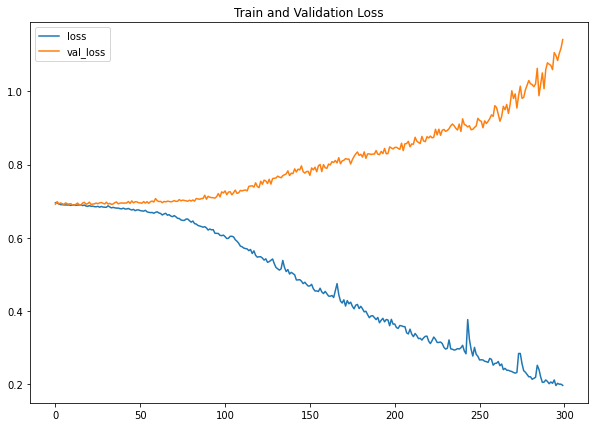

In [56]:
plt.figure(figsize = (10,7))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

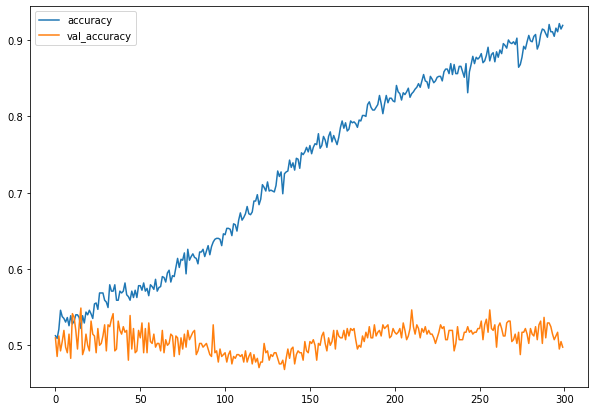

In [57]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### hmmm what I learnd from tamrin 2 


1.   one-step ahead predictions are more accurate than the multi-step forecasts.
2.   Stock-price predictions can be modelled fairly accurately if we forecast only one-step ahead.
3.   Stock Returns cannot be modelled with good accuracy for both single-step and multi-step forecasts. :(




> Indented block



